# Predator Prey

In [44]:
from lblcrn.crn_sym import *
from lblcrn.experiments.simulate import *

In [45]:
sm = SpeciesManager()
x1 = sm.sp('x')
x2 = sm.sp('y')
rsys = RxnSystem(
    Rxn(x1 + x2, 2 * x2, 1.5),
    Rxn(x1, 2 * x1, 1),
    Rxn(x2, None, 1),
    Conc(x1, 2),
    Conc(x2, 1),
    sm
)

In [46]:
xps, ts = simulate(rsys, time=40, max_step=1e-2)

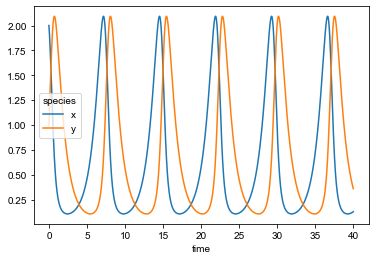

In [47]:
ts.plot()

# HIV

In [48]:
# Insipiration of this example came from Nowak, M. and May, R. M. Virus dynamics: mathematical principles of immunology 
# and virology: mathematical principles of immunology and virology. Oxford university press, 2000.

# A hard-coded solution can be found at https://apmonitor.com/pdc/index.php/Main/SimulateHIV

sm = SpeciesManager()
v = sm.sp('virus')
h = sm.sp('healthy')
inf = sm.sp('infected')

rsys = RxnSystem(
    sm,
    Rxn(h + v, inf , 2e-7), 
    Rxn(inf, None, 0.5),
    Rxn(h, None, 0.2),
    Rxn(v, None, 5),
    Rxn(None, h, 1e5),
    Rxn(inf, v + inf, 100),
    
    Conc(h, 1000000),
    Conc(v, 100),
)

In [49]:
xps, ts = simulate(rsys, 45, max_step=0.01)

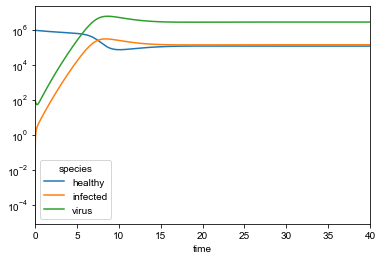

In [51]:
ts.plot()

# All functionalities of matplotlib that you are familiar with are also applicable here
import matplotlib.pyplot as plt
# If you want to plot it in log scale 
plt.yscale("log")
plt.xlim(0,40)

# HIV with a Schedule Function

In [53]:
sm = SpeciesManager()
v = sm.sp('virus')
h = sm.sp('healthy')
inf = sm.sp('infected')

rsys = RxnSystem(
    sm,
    Rxn(h + v, inf, 2e-7),
    Rxn(inf, None, 0.5),
    Rxn(h, None, 0.1),
    Rxn(v, None, 5),
    Rxn(None, h, 1e5),
    Rxn(inf, v + inf, 100),
    
    Conc(h, 1000000),                
    Schedule(v, {2: 100, 8:-8*1e6}), # Using a dictionary to define add or remove a particular species at specific time. 
)

In [54]:
xps, ts = simulate(rsys, 45, max_step=0.01)

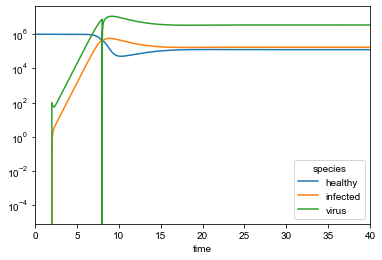

In [55]:
ts.plot()
import matplotlib
plt.xlim(0,40)
matplotlib.pyplot.yscale( "log")

In [40]:
# ts.df returns a pandas dataframe for the species dynamics. All expected pandas functionality can be used.
ts.df

species,healthy,infected,virus
time,,,
0.000000,1000000.000000,0.000000,0.000000e+00
0.010000,1000000.000000,0.000000,0.000000e+00
0.020000,1000000.000000,0.000000,0.000000e+00
0.030000,1000000.000000,0.000000,0.000000e+00
0.040000,1000000.000000,0.000000,0.000000e+00
...,...,...,...
44.967054,125627.790650,174874.510341,3.480004e+06
44.977054,125627.792488,174874.508170,3.480004e+06
44.987054,125627.794323,174874.506011,3.480004e+06


In [56]:
# Querying information for specific time-steps is even easier
ts.at(3)

species
healthy     999979.626289
infected        17.700977
virus          239.178070
Name: 2.9949566930890628, dtype: float64

# H20 Adsorption and Complex Formation on Ag(111)

In [57]:
# Publication and citation can be found here: https://pubs.acs.org/doi/10.1021/jacs.8b13672

sm = SpeciesManager()

y1 = sm.sp('H2Og', Orbital('1s', 535.0))
x2 = sm.sp('H2O*', Orbital('1s', 532.2))
x3 = sm.sp('OH*', Orbital('1s', 530.9))
x4 = sm.sp('O*', Orbital('1s', 530.0))
x53 = sm.sp('OH.H2O_hb', Orbital('1s', 531.6))
x54 = sm.sp('O.H2O_hb', Orbital('1s', 531.6))
x6 = sm.sp('multiH2O', Orbital('1s', 533.2))
x7 = sm.sp('O2g', Orbital('1s', 535.0))

rsys = RxnSystem(
    Rxn(x4 + y1, x54, 3.207654),
    Rxn(x3 + y1, x53, 1.363342),
    RevRxn(x54, x3 + x3, 6.220646,0.160755),
    Rxn(x53, x2 + x3, 0.299507),
    Rxn(x54, x2 + x4, 0.167130),
    Rxn(x2, y1, 1.939313),
    Rxn(y1, x2, 0.515646),
    Rxn(x53, y1 + x3, 0.733491),
    Rxn(x54, x4 + y1, 0.311754),
    Rxn(x53 + y1, x6, 1.038423),
    Rxn(x6, x53 + y1, 0.962999),
    RevRxn(x4 + x4, x7, 0.002342,426.922895),
    Conc(y1,1),
    Conc(x4,0.25),
    sm
)

In [58]:
xps, ts = simulate(rsys, 500, max_step=1)

[Orbital(name='1s', binding_energy=532.2)]
[Orbital(name='1s', binding_energy=535.0)]
[Orbital(name='1s', binding_energy=530.0)]
[Orbital(name='1s', binding_energy=531.6)]
[Orbital(name='1s', binding_energy=535.0)]
[Orbital(name='1s', binding_energy=530.9)]
[Orbital(name='1s', binding_energy=531.6)]
[Orbital(name='1s', binding_energy=533.2)]


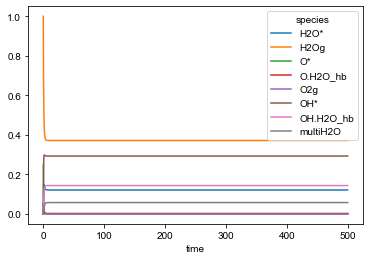

In [61]:
ts.plot()

[Orbital(name='1s', binding_energy=532.2)]
[Orbital(name='1s', binding_energy=535.0)]
[Orbital(name='1s', binding_energy=530.0)]
[Orbital(name='1s', binding_energy=531.6)]
[Orbital(name='1s', binding_energy=535.0)]
[Orbital(name='1s', binding_energy=530.9)]
[Orbital(name='1s', binding_energy=531.6)]
[Orbital(name='1s', binding_energy=533.2)]


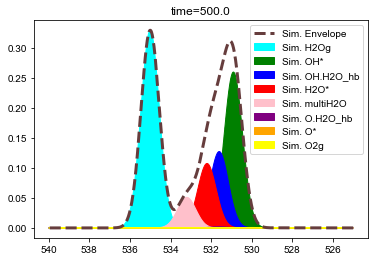

In [62]:
xps.plot()